# <center> Accident table visualization </center>

## Introduction

In this notebook, we want to visualize the data in the accident table to figure out what factors are most sensitive to the drunk-driver involvement.  

## Method
In particular, we plot the probability distribution of variables in the accident table. The distributions are plotted as histograms and normalized by the total number of event in each plot. So for each variable, we have two distributions, one for accidents with drunk driver involved and one without drunk driver involved. Then these two distributions are compared and we rank the variables by the difference between the distribution for this variable. 

In [243]:
# import libraries and data.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data
acc_df = pd.read_csv('data/fars_train/accident_train.csv')

In [244]:
def varDiff(varName):
    '''
    function to calculate the the difference of distributions between drunk driver involved accident and 
    sober driver involved accident for a given variable
    '''
    var_df = acc_df[[varName, 'DRUNK_DR']]
    
    # get the data for drunk driver and sober driver
    drunk = var_df[(var_df.DRUNK_DR==True)][varName].values
    sober = var_df[(var_df.DRUNK_DR==False)][varName].values

    # determine the lower and upper bound for the histogram
    minBin = int(np.floor( min(min(drunk), min(sober))))
    maxBin = int(np.ceil( max(max(drunk), max(sober)) ))

    # get the normalized histograms 
    bins = range(minBin, maxBin+1)
    drunk_hist = np.histogram(drunk, bins=bins, density=True)[0]
    sober_hist = np.histogram(sober, bins=bins, density=True)[0]

    # calculate the difference between this two histograms
    diff = np.sum(np.abs(drunk_hist - sober_hist))
    return diff

In [318]:
varList = ['STATE', 'VE_FORMS', 'PEDS', 'PERSONS', 'COUNTY', 'CITY', 'YEAR', 'DAY', 'MONTH', 'DAY_WEEK', 
           'HOUR', 'MINUTE', 'NHS', 'ROAD_FNC', 'ROUTE', 'MILEPT', 'SP_JUR', 'HARM_EV', 'MAN_COLL',
           'REL_ROAD', 'LGT_COND', 'WEATHER', 'CF1', 'CF2', 'CF3', 'FATALS']
varImp = {}
for varName in varList:
    varImp[varName] = varDiff(varName)
varImp = sorted(varImp.items(), key=lambda x: (x[1], x[0]), reverse=True)

In [319]:
varImp

[('HOUR', 0.803560313712263),
 ('LGT_COND', 0.72777858946492047),
 ('HARM_EV', 0.57458844324181102),
 ('REL_ROAD', 0.55413604627784629),
 ('PERSONS', 0.35462667860703928),
 ('DAY_WEEK', 0.34200820278579569),
 ('VE_FORMS', 0.30138022235478146),
 ('PEDS', 0.28473427965919285),
 ('MAN_COLL', 0.27181088933306663),
 ('ROAD_FNC', 0.24186566822220609),
 ('ROUTE', 0.20444572636785066),
 ('MILEPT', 0.19417883431798705),
 ('STATE', 0.18377225189626858),
 ('CITY', 0.17773653635980013),
 ('NHS', 0.16321676979308203),
 ('COUNTY', 0.099459000945682635),
 ('MINUTE', 0.072138296125120641),
 ('WEATHER', 0.061898319280904154),
 ('YEAR', 0.051337438227483753),
 ('MONTH', 0.041667873302338385),
 ('FATALS', 0.028855882321193276),
 ('DAY', 0.028496875221100532),
 ('CF1', 0.023675905563153018),
 ('SP_JUR', 0.011102314972212635),
 ('CF2', 0.0031366821429606819),
 ('CF3', 0.0018443408376188945)]

(-0.5, 20)

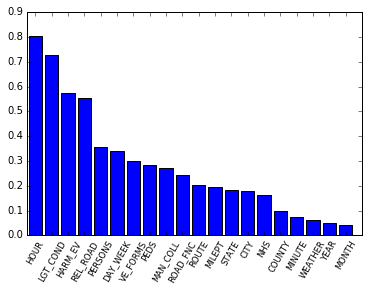

In [320]:
varImp = varImp[0:20]
varImp = np.array(varImp)
diffValue = np.array(varImp[:,1], float)
plt.bar(range(len(diffValue)), diffValue, align='center')
plt.xticks(range(len(varImp[:,0])), list(varImp[:,0]), size='small', rotation=60)
plt.xlim(-0.5, len(diffValue))